# TTM4105 2025 Assignment 1

The purpose of this assignment is to enhance your understanding of the concepts introduced in the lectures via *experience based learning*. The assignment has two parts where Part 1 focuses on how audio is converted into a signal and Part 2 focuses on the main elements of transmitting this signal over a medium. 


Submission guidelines:<br>
You should export this notebook with solved tasks as a PDF. Your submission should then contain two items: <br>
a.) A zip archive of the complete folder named *TTM4105_Assignment1_GroupX*, <br>
b.) Exported PDF of the notebook *including the group number* in the file name. In case you need help with jupyter notebook and exporting your results, there is a file called *instructions_assignment1_TTM4105.pdf* on Blackboard.   
One delivery per group is sufficient.<br>

In [1]:
!pip install librosa

zsh:1: /usr/local/bin/pip: bad interpreter: /usr/local/opt/python@3.9/bin/python3.9: no such file or directory


In [2]:
### NB! ###
# Run this box to import all nessecary libraries.
# Remember to fill in your own student number below before starting on your assignment.

%run -i 'scripts/assignment1-init.py'

# TODO: Fill in your group number + 20000 here (e.g.: Group 18 has seed 20018)
seed = 20018

Exception: File `'scripts/assignment1-init.py'` not found.

# <a id='part1'>Part 1: Filtering, Sampling and Quantization [40 points]</a>
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <a id='1.1-filtering'>1.1 Filtering </a>
| |
|---|
| <img src="figures/filtering.png" alt="Signal Filtering Techniques" width="600"/> |
|*Source: [Wikipedia](https://en.wikipedia.org/wiki/Filter_%28signal_processing%29)* |
<a id="filtering"><p style="text-align: center;"><b>Figure 1.1: Different signal filtering methods that can be used to remove unwanted frequencies from the signal.</b></p></a>

In sound and telecommunications, filtering is an essential process for isolating specific frequency bands, removing noise and enhancing the overall quality of audio or data transmission. In order to improve communications, we need to understand how this process works and how to apply its principles properly.


## <a id='1.1.1-experimenting_filtering'>Experimenting with Filter Cutoff</a>

A cutoff frequency is where a filter starts reducing a signal, determining which frequencies pass and which are blocked. By adjusting the cutoff, you can hear how filters shape the audio. Start by plotting the frequency domain of the provided audio clip to see which frequencies are present and their amplitudes. Note that we can have a lower and upper cutoff frecuency depending on the type of filter.


## <a id='1.1.2-Coding_Task'>Plot the Frequency Domain</a>
Listen to audio/around.wav. Below you will find a code block with some template code for creating a frequency domain for the provided audio clip. You can use the helper code provided, or create your own function to plot the frequency domain of the audio clip. The output of the code should be used to answer questions in Part 1.1.1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio

def isolate_voice_and_drums(audio_file, sampling_rate=None):
    """
    Isolates voice and drums using a band-pass filter in the frequency domain.

    Args:
        audio_file (str): Path to the audio file.
        sampling_rate (float, optional): Sampling rate to use. If not provided, it is extracted from the file.

    Returns:
        IPython.display.Audio: Audio object for playback.
    """
    # Load audio
    signal, sr = librosa.load(audio_file, sr=sampling_rate)
    if sampling_rate is None:
        sampling_rate = sr

    # Compute FFT
    fft_spectrum = np.fft.fft(signal)
    fft_length = len(fft_spectrum)
    frequencies = np.fft.fftfreq(fft_length, d=1/sampling_rate)

    # Define band-pass filter cutoffs for voice and drums
    low_cutoff = 250    # Hz
    high_cutoff = 12000 # Hz

    # Create filter mask
    band_pass_mask = (np.abs(frequencies) >= low_cutoff) & (np.abs(frequencies) <= high_cutoff)

    # Apply the filter in frequency domain
    filtered_fft = fft_spectrum * band_pass_mask

    # Inverse FFT to reconstruct the filtered time-domain signal
    filtered_signal = np.fft.ifft(filtered_fft).real

    # Plot the magnitude spectrum of the filtered signal
    magnitude_spectrum = np.abs(filtered_fft)
    positive_freqs = frequencies[:fft_length // 2]
    positive_magnitudes = magnitude_spectrum[:fft_length // 2]

    plt.figure()
    plt.plot(positive_freqs, positive_magnitudes)
    plt.xlabel("Frequency (Hz)")
    plt.xlim(0,6000)
    plt.ylabel("Magnitude")
    plt.title("Filtered Frequency Spectrum (60–5000 Hz)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Return audio for playback
    return Audio(filtered_signal, rate=sampling_rate)

# Example usage:
isolate_voice_and_drums("audio/around.wav")


*Don't care about the warning when compiling the previous code* <br>

Now that you have plotted the frequency domain for the audio signal, you can see the frequencies the audio clip consists of. This will be useful for the upcoming questions. Use the frequency domain acquired to answer the following questions. You can also feel free to plot a zoomed version of the spectrum, focusing on the more relevant frequencies for this audio.

## <a id='1.1.3-filtering_questions'>Filtering Questions [8 points]</a>

In the cells bellow you have a code of a low-pass and a band-pass filter respectively. <br>
*Note: We highly recommend using headphones for this task.*<br>

**Q1.1.1 [2 points]:** Referring to **plot output**, at which frequency range (low, medium, or high) is the signal magnitude observed to be the highest? <br>
*Answer:* At low frequencies. The spectrum is largest in the 50-200 Hz region (kick+bass fundamentals).

**Q1.1.2 [2 points]:** The audio file contains simultaneous sounds from three instruments: drums, bass, and voice. Which type of filter is appropriate for isolating the bass frequencies? Specify the cutoff frequencies required for this isolation. Adjust the parameters to determine the optimal solution and document the results. <br>
*Answer:* To isolate the bass, a low-pass filter is appropriate, since bass energy lies in the lower en of the spectrum. By setting the high cutoff frequency around 180 - 200 Hz, the filter retains the fundemental range of the bass and kick drum while removing most of the voice and higher-frequency drum components. 

**Q1.1.3 [2 points]:** Which type of filter should be employed to isolate the voice and drums? Indicate the cutoff frequencies necessary for this isolation. Modify the parameters to achieve the desired results and document the findings. <br>
*Answer:* Tested a band-pass setup to keep the vocal + drum content while removing bass. The best results where with band-pass from 250 to 6000 Hz where we got the cleanest isolation of voice and most drum components. tested also with a band pass from 250 - 12000 Hz where we got a brighter version, vocals was still clear. In the end, a band pass between 250 - 6000 Hz is a good choice for balanced voice + drums isolation. For a brighter drum sound, we can use 250 - 12 000 Hz.

**Q1.1.4 [2 points]:** Discuss the benefits of filtering an audio signal. What are the potential consequences of excessive or insufficient filtering? Utilize the provided code to filter the audio signal at cutoff frequencies of 1500Hz and 10000Hz. Document these changes, describe your observations and the auditory differences between lower and higher cutoff frequencies. <br>

*Answer:* Filtering improves audio quality by removing unwanted frequencies such as low-en rumble, electrical hum, or high-frequency hiss. It helps isolate instruments or voices, reduces masking, and makes signals clearer for both listening and further processing. 

If filtering is excessive, important parts of the signal are lost: low cutoffs make the sound muffled and reduce speech intelligibility, while too much high-frequency removal elimnates brightness and naturalness. If filtering is insufficient, noise and irrelevant frequencies remain, leading to a muddy or unclear mix.

With the provided code a 1500 Hz cutoff, most of the mid and high contnet was removed. The result sounded very muffled, where vocals lost clarity, cymbals and hi-hats disappeared, and only bass and lower mids were audible. At a 10 000 Hz cutoff, only the very high "air" frequencies were removed. The sound stayed clear and natural, but slightly less bright.




In [ ]:
"""
Args:
    input_file (str): Path to the input WAV file.
    output_file (str): Path to the output filtered WAV file.
    cutoff (int, optional): Cutoff frequency (Hz). Defaults to 1000.
    numtaps (int, optional): Number of filter taps. Defaults to 201.
"""

# Args (You can use your own audio file if you wish)
input_file = 'audio/around.wav'
output_file = 'audio/around-lpfiltered.wav'

# Apply Filter
apply_fir_filter(input_file, output_file, cutoff=10000)

# Import and Display Audio
sampling_rate, freq = sp.io.wavfile.read('audio/around-lpfiltered.wav')
ipd.Audio(freq, rate=sampling_rate)

In [ ]:
"""
Applies a bandpass FIR filter to a WAV file.

Args:
    input_file (str): Path to the input WAV file.
    output_file (str): Path to the output filtered WAV file.
    lowcut (int, optional): Low cutoff frequency (Hz). Defaults to 500. Min 1.
    highcut (int, optional): High cutoff frequency (Hz). Defaults to 1500. Max 22049.
    numtaps (int, optional): Number of filter taps. Defaults to 201.
"""

# Args (You can use your own audio file if you wish)
input_file = 'audio/around.wav'
output_file = 'audio/around-bpfiltered.wav'

# Apply Filter
apply_bandpass_filter(input_file, output_file, lowcut=1, highcut=100)

# Import and Display Audio
sampling_rate, freq = sp.io.wavfile.read('audio/around-bpfiltered.wav')
ipd.Audio(freq, rate=sampling_rate)

# <a id='1.2-sampling'>1.2 Sampling</a>
| |
|---|
| <img src="figures/signal_sampling.png" alt="Signal Sampling" width="600"/> |
|*Source: [Wikipedia](https://en.wikipedia.org/wiki/Sampling_%28signal_processing%29)* |
<a id="fig1"><p style="text-align: center;"><b>Figure 2.1: Signal sampling representation. The continuous signal S(t) is represented with a green colored line while the discrete samples are indicated by the blue vertical lines.</b></p></a>

The image shows signal sampling, where blue vertical lines represent discrete data points from a continuous signal. Sampling discretizes the signal along the x-axis, crucial for efficient processing in digital signal processing and telecommunications, enabling analog-to-digital conversion.</b>


## <a id='1.2.1-nyquist_sampling'>Nyquist–Shannon Sampling Theorem and Aliasing</a>

To ensure accurate signal reconstruction and avoid aliasing, the Nyquist–Shannon sampling theorem states that the sampling rate must be at least twice the signal's bandwidth. For example, sound is often sampled at 44.1 kHz. Excessive sampling increases storage and computational load without adding useful information.</p>

<p style='text-align: justify;'>
When a signal with frequency components above the Nyquist limit is sampled, aliasing occurs, causing higher frequencies to appear as lower frequencies due to insufficient sampling. This is shown in the figure below.
<p/>

| |
|---|
| <img src="figures/aliasing.jpg" alt="Aliasing" width="600"/> |
|*Source: [ni.com docs](https://www.ni.com/docs/en-US/bundle/labwindows-cvi/page/advancedanalysisconcepts/aliasing.html)* |
<a id="fig2"><p style="text-align: center;"><b>Figure 2.2: Adequate sampling can be seen in the first graph, and aliasing due to sampling frequency lower than required by Nyquist theorem can be seen in the second graph.</b></p></a>

## <a id='1.2.2-aliasing'>1.2 Experimenting with Aliasing (plotting) [6 points]</a>

In this section you will directly observe the effects of aliasing and understand why the Nyquist limit is so important in digital signal processing.

**Use the code block below to try the following experiments:**
- Sample different frequencies below the Nyquist limit
- Sample different frequencies at or above the Nyquist limit
- Adjust the phase shift <br>

**Make sure to document results and findings in the final delivery. [6 points]** <br>
*Note: The code might result in OptimizeWarning but that does not change the outcome and can be safely ignored.*

In [ ]:
"""
Args:
    frequency (int): Initial frequency (Hz).
    sample_rate (int): The sample rate to sample the inital frequency at (Hz).
    shift_wave (int): Amount of phase shift to add to the initial wave (How many samples to shift the wave to the left).
"""

sample_frequency(frequency=20, sample_rate=40, shift_wave=150)

## <a id='1.2.4-aliasing_questions'> Aliasing Questions [4 points]</a>

**Q1.2.1 [2 points]:** Given the initial parameters (frequency = 20 Hz, sample rate = 35 Hz, shift wave = 150), does aliasing occur? Compare the frequencies in both signals. Show the obtained results. <br>
*Answer:* To see if the initial parameters occur, we can use Nyquist frequency formula f_nyquist = f_s / 2 => 35/2 = 17.5 Hz. This means any true signal frequency above 17.5 Hz will alias when sampled at 35 Hz. Since the original signal is 20 Hz, it's above Nyqyist, so then aliasing will occur.

**Q1.2.2 [2 points]:** Sample the signal at the Nyquist limit. What observations can be made? Identify the correct information within the signal and determine which aspects require reconstruction. Show the results. <br>
*Answer:* Sampling the signal the Nyquist limit made us change the sample_rate = 40, because Nyquist limit for a 20Hz signal is f_s => 2f_max = 40. Observing at Graph 2 where 20Hz signal sampled at 40Hz, we can observe that the samples (black dots) line up twice per cycle of the 20 Hz sine wave. This confirms we are sampling at the Nyquist limit, with only 2 samples per period.

Observation on Graph 3 where 20 Hz signal is reconstructed with a sample rate of 40 hz, we can observe that reconstruction shows a frequency of 20.00 Hz, meaning the frequency content is captured correctly. However, the red wave does not perfectly match the original shape, it shows some differences in amplitude and phase because of the limited sample points.

So the correct information is that the frequency of 20 Hz is correctly represented, but which aspects that needs some reconstruction is the amplitude and phase in graph 4. Because we can observe that the red and blue waved don't align in phase/amplitude.


## <a id='1.2.6-hearing-aliasing'>Hearing Aliasing [6 points]</a>
In this task, we have an audio of a siren that has been sampled at 8kHz (You can run the cell below to watch and hear it). What we are going to do is to downsample this audio using the resample rate parameter: <br>

$ New Sample Rate = \frac{Original Sample Rate}{Resample Rate} $ <br>

If the resample rate is 2, we will have the half of the samples that we had in the original. For this task we will initially set this parameter to 4, but feel free to change it and try different combinations to get more information about what is happening.



*Note: The code has a UserWarning but that does not change the outcome and can be safely ignored.*

In [ ]:
"""
Run this code block to display the original audio
"""


# Args (You can use your own audio file if you wish)
input_file = 'audio/siren.wav'
output_file = 'audio/siren-filtered.wav'

# We first filter the signal for a better view
apply_bandpass_filter(input_file, output_file, lowcut=400, highcut=1250)

# Import Audio
sampling_rate, freq_sweep_8000 = sp.io.wavfile.read('audio/siren-filtered.wav')

# Plot Spectrogram
scripts.signal.plot_spectrogram(freq_sweep_8000, sampling_rate)

# Display Audio
ipd.Audio(freq_sweep_8000, rate=sampling_rate)


Now, we resample the audio so we take the fourth part of the samples:

In [ ]:
"""
Change the resample factor to sample the frequency sweep at lower sample rates.
"""
# Change this
resample_factor = 4

# Resample Audio
freq_sweep_new, new_sampling_rate = scripts.signal.resample_audio(resample_factor, sampling_rate, freq_sweep_8000)

# Plot Spectrogram
scripts.signal.plot_spectrogram(freq_sweep_new, new_sampling_rate)

# We interpolate the signal for being able to reproduce it
interpolated_freq, interpolated_sampling_rate = scripts.signal.interpolate_audio(freq_sweep_new, new_sampling_rate, factor=2)

# Display Audio
ipd.Audio(interpolated_freq, rate=interpolated_sampling_rate)

**Q1.2.3 [3 points]:** What differences can be observed in the spectral analysis of both audio signals? <br>
*Answer:* At 8 kHz, the spectrogram shows content cleanly up to 4 kHz, which is the Nyquist limit for that sampling rate. In contrast, at 2 kHz, everything above 1 kHz (its Nyquist frequency) is folded back into the 0–1 kHz range. This produces mirrored, downward ramps and extra stripes below 1 kHz, which are classic alias images of the sweep as it crosses the Nyquist frequency. While the 8 kHz spectrogram displays one clean rising sweep with its expected harmonics, the 2 kHz version contains reflected components that distort the spectrum. As a result, energy that should appear above 1 kHz is reflected back into the lower frequencies (for example, a true 1.2 kHz tone is mirrored to 800 Hz), creating denser and more inharmonic components. The 8 kHz signal therefore maintains a higher spectral centroid and looks cleaner, while the 2 kHz signal shows a lower apparent centroid with extra lines and noise-like filling due to aliasing.

**Q1.2.4 [3 points]:** What auditory differences can be perceived when comparing both audio signals? <br>
*Answer:* When listening to the two signals, the differences are clear. In the 2 kHz version, as the sweep crosses 1 kHz, the pitch bends in the wrong direction or seems to “reflect,” leading to strange warbles that are not present in the 8 kHz version. The lower-rate signal also introduces additional inharmonic tones, giving it a buzzy or metallic texture, whereas the 8 kHz version sounds cleaner and more natural. Furthermore, the 2 kHz signal loses much of the high-frequency brightness that is still audible at 8 kHz, because those higher frequencies are not preserved but instead folded down into lower ranges, misrepresenting the true sound.


# <a id='1.3-Quantization'>1.3 Quantization</a>


Quantization is the process of converting a continuous range of signal amplitudes into discrete levels, similar to rounding a curve to the nearest horizontal line. This reduces precision but enables digital representation. Unlike sampling, which discretizes the x-axis, quantization discretizes the y-axis. We can also have uniform and non-uniform quantization, which depends on if we have equal-sized intervals to represent signal values or not. An example of both is shown in the figure below.

| |
|---|
| <img src="figures/quantization.png" alt="Quantization" width="600"/> |
|*Source: [Tech](https://www.researchgate.net/figure/a-Mid-rise-uniform-quantization-The-mid-point-value-within-a-cell-is-taken-as-the_fig1_309083844)* |
<a id="fig5"><p style="text-align: center;"><b>Figure 3.1: Quantization schemes. (a) Mid-rise uniform quantization. The mid-point value within a cell is taken as the quantized value for a sample point falling in that cell. (b) The µ-law companding curve and its corresponding non-uniform quantization.</b></p></a>

## <a id='1.3-quantization_questions'> Quantization Questions [8 points]</a>

**Q1.3.1 [2 points]:**  How does the number of quantization levels impact the resolution of a signal?<br>
*Answer:* The number of quantization levels directly determines the resolution of the signal. More levels mean that the amplitude axis is divided into finer intervals, allowing each sample to be represented more accurately. This reduces quantization error and increases the signal-to-quantization-noise ratio (SQNR). Conversely, fewer levels result in coarser resolution, larger rounding errors, and more audible distortion or noise in the reconstructed signal.

**Q1.3.2 [2 points]:** What methods can be employed to reduce quantization error? <br>
*Answer:* Quantization error can be reduced by increasing the number of quantization bits, which raises the resolution. Dithering can also be applied by adding low-level noise before quantization to mask and randomize distortion. Noise shaping is another technique that redistributes quantization noise into less perceptible frequency ranges. Oversampling combined with filtering can reduce effective noise, and non-uniform quantization methods like μ-law or A-law companding allocate more resolution to the most perceptually important amplitude ranges.

**Q1.3.3 [2 points]:** Under what circumstances is non-uniform quantization more advantageous than uniform quantization? <br>
*Answer:* Non-uniform quantization is more advantageous when the signal amplitude distribution is not uniform, especially when low-amplitude values carry more perceptual or informational importance, as in speech signals. In these cases, companding (such as μ-law or A-law) provides more quantization levels near zero amplitude, improving perceived quality without increasing the overall bit rate. This makes non-uniform quantization ideal for applications like telephony and voice coding.

**Q1.3.4 [2 points]:**  What are the disadvantages associated with non-uniform quantization?<br>
*Answer:* The main disadvantages of non-uniform quantization are its increased complexity and the requirement for matched encoding and decoding schemes. If the companding function is not applied consistently, signal distortion occurs. Additionally, non-uniform quantization introduces a non-linear amplitude mapping, which can complicate subsequent signal processing tasks such as mixing or filtering. It may also introduce bias when used on signals that do not match the assumed distribution, leading to less efficient use of quantization levels compared to uniform quantization in such cases.


## <a id='1.3.2-Quantization-Effects'>How does quantization affect audio signals? [8 points]</a>

Use the code block below to answer the upcoming questions. 

*Note:* In the cell below, you can run code to adjust the number of quantization bits for an audio clip. The output will include the new audio clip and two graphs. The first graph shows samples on the x-axis and their values on the y-axis. With many samples, zooming in on the x-axis can help. You can adjust the variable xlim_zoom to see a zoomed-in second graph. That works for both uniform and non-uniform quantization functions.

*Note:* The first plot and audio is uniform quantization and the second one is non-uniform quantization.


In [ ]:
"""
Args:
    input_file (str): Path to the input WAV file.
    output_file (str): Path to the output filtered WAV file.
    quantization_bits (int): Amount of quantization bits.
    original_quantization (int, optional): Amount of quantization bits in the original audio file. Defaults to 16.
"""

# Args (You can use your own audio file if you wish)
input_file = 'audio/voice.wav'
output_file = 'audio/voice_lq.wav'
output_file_nl = 'audio/voice_nlq.wav'
quantization_bits = 8 # Change this to change the quantization bits

# Quantize Signal
audio_data, sampling_rate = signal_quantization(input_file, output_file, quantization_bits=quantization_bits)


# Non-linear
nl_audio_data, nl_sampling_rate = scripts.sample_helper.signal_quantization_nonlinear(input_file, output_file_nl, quantization_bits=quantization_bits)


# Plot quantizaiton graph
xlim_zoom = (11000, 11200) # You may want to change this depending on what audio file you have loaded
scripts.signal.plot_signal(audio_data, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)

# Plot quantizaiton graph non-linear
xlim_zoom = (11000, 11200) # You may want to change this depending on what audio file you have loaded
scripts.signal.plot_signal(nl_audio_data, nl_sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)



# Import and Display Audio
ipd.Audio(audio_data, rate=sampling_rate)


In [ ]:
ipd.Audio(nl_audio_data, rate=sampling_rate)


**Q1.3.5 [2 points]:** Change the initial parameter using different quantization bits. Present the results. <br>
*Answer:* When the number of quantization bits is reduced from 16 (original) to 12, 8, and 4 bits, the audio quality decreases progressively. At 12 bits, the signal still sounds close to the original, with only a slight background hiss. At 8 bits, the hiss becomes more noticeable, and some details in the voice are lost. At 4 bits, the signal is heavily degraded, with strong distortion and a “robotic” sound. The plots confirm this: the waveforms at lower bit depths show coarser steps, and the zoomed-in graphs highlight the loss of resolution.

**Q1.3.6 [2 points]:** How does reducing the number of quantization levels affect the signal? <br>
*Answer:* Reducing the number of quantization levels increases the step size between representable values, which makes the waveform less accurate. This increases quantization error and raises the noise floor. Perceptually, the signal becomes noisier, less clear, and can sound distorted or harsh, especially for low-level details and transients.

**Q1.3.7 [2 points]:** Identify several factors that are important when determining the number of quantization bits required for a specific waveform. <br>
*Answer:* Key factors include the dynamic range of the signal (difference between quiet and loud parts), the acceptable signal-to-noise ratio (SNR), the type of signal (e.g., speech, music, or sensor data), perceptual sensitivity of the listener, and storage or bandwidth constraints. For professional audio, higher bit depths (16–24 bits) are needed, while for speech coding in telephony, fewer bits with companding can still provide acceptable quality.

**Q1.3.8 [2 points]:** Which type of signal, uniform or non-uniform, shows a better quality? What differences can be observed between them? Why is this type of quantization more effective for this particular audio signal? <br>
*Answer:*For speech signals, non-uniform quantization generally provides better quality than uniform quantization. This is because non-uniform schemes (such as μ-law or A-law) allocate more levels to small amplitudes, which preserves soft sounds and speech nuances where the human ear is most sensitive. Compared to uniform quantization, non-uniform quantization reduces the audible noise in quiet sections, producing clearer and more natural audio. This makes it more effective for voice recordings, where preserving intelligibility at low bit rates is crucial.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <a id='part2'>Part 2: Digital Signal processing and modulation [40 points]</a>
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In this section, we'll explore digital modulation and wireless symbols, focusing on using schemes like ASK, PSK, FSK, and QAM to transmit information (1's and 0's). We'll also cover IQ plots, constellations, and use Python to simulate transmissions.

## 2.1 Symbols
A symbol represents certain bits of information. The transmitted signal consists of these symbols, allowing us to convey multiple bits per symbol, thus enabling faster data transmission by manipulating wireless signals. This is why both data rate and symbol rate are used to describe communication speeds.

## 2.2 Modulation and Transmitting Bits
Modulation converts data into electrical signals for transmission. For example, binary data can be transmitted over a wire, where high and low voltage levels represent 1's and 0's, with each being a symbol. An alternating symbol signal would look like this:
| |
|---|
| <img src="figures/voltage_levels.png" alt="Voltage Levels" width="800"/> |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.1:* Electrical signal representing binary information through varying voltage levels. In the given illustration, each symbol has a set duration of 0.1 seconds, which corresponds to a single bit.</b></p></a>
 
Now let's picture that we want to transmit more information per symbol. To transmit more than one bit per symbol, an intuitive approach involves introducing additional levels to represent symbols. For instance, employing a 4-level amplitude modulation enables the transmission of 2 bits per symbol. _Figure 2.2_ shows how this can be done in practice. Note that the data conveyed in the two figures (_Figure 2.1_ and _Figure 2.2_) are not the same.


| |
|---|
| <img src="figures/4_level_shift_keying.png" alt="Several Voltage Levels" width="800"/> |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.2:* 4-level amplitude modulation scheme. This modulation scheme enables the transmission of 2 bits per symbol with a symbol duration of 0.1 seconds. This illustrates the concept of conveying multiple bits within a single symbol.</b></p></a>



## <a id='2.2-Shift keying questions'>2.2 Questions [8 Points]</a>

Note: Symbol duration is 0.1s

**Q2.2.1 [2 points]:** How many bits per second are transmitted in Figure 2.2?  <br>
*Answer: We have 4 voltage levels, each symbol is 2 bits (2^2=4 combinations). 2bits/symbol*10symbols/sec= 20 bits per second*

**Q2.2.2 [2 points]:** What throughput can be achieved with 16 different amplitude levels and 8 ns symbols?  <br>
**Answer: Throughput = symbol rate * bits per symbol
the symbol rate is: 1/8ns=1/8*10^-9=1,25*10^8 symbols/second
Bits per symbol = log_2(16)=4
Throughput=4*1,25*10^8=5,0*10^8bps=500Mbps
The throughput for the 16 different amplitude levels and 8ns symbols is 500Mbps= **

**Q2.2.3 [2 points]:** Can you think of a general formula of how to calculate bits per symbol based on the amount of amplitude levels used? <br>
*Answer: Bits per symbol = log_2(n) where n is the amount of amplitude levels* 

**Q2.2.4 [2 points]:** When calculating the respective throughputs we have neglected an important phenomenon that would occur in real life. What important real life factor is left out in the calculations above?  <br>
*Answer: In real life calculations, we need to consider noise. Transmission channels can experience thermal noise, interference and other signal degradation. This could in worst case make it impossible to distinguish between amplitude levels. Real life systems have implemented error-correction mechanism to combat this.* 




## 2.3 Wireless Symbols and Modulation
Now that we know how to send symbols over a wired medium, let's explore transmitting data wirelessly using radio waves. The principles of modulation are similar for both wired and wireless transmission, but we can't directly send the wired signal for two reasons:

1. **Low frequencies:** Signals below 300 kHz need impractically large antennas for transmission.
2. **Square waves:** These waves are inefficient as they consume too much bandwidth.

To transmit wirelessly, we use a "carrier wave," a continuous wave that carries no information on its own. We modify it, like how we adjusted voltage levels for wired transmission, to convey data.

How do we modify the carrier wave? We alter the sinusoidal carrier wave's parameters:
1. Amplitude, $A$
2. Frequency, $f$
3. Phase, $\phi$

By adjusting these, we modulate data onto the carrier wave, creating a wireless signal.


## 2.4 Amplitude Shift Keying (ASK)
Amplitude Shift Keying (ASK) is a simple digital modulation scheme where the amplitude of the carrier wave is varied to represent data. In ASK, a fixed-amplitude carrier wave at a fixed frequency is transmitted for a specific time to represent a symbol. For instance, in a 2-ASK system, the carrier is transmitted at one amplitude for a 1 and a reduced amplitude for a 0. Since only two amplitude levels are used, this is called 2-ASK. An example of 2-ASK is shown below:


| |
|---|
| <img src="https://pysdr.org/_images/ASK.svg" alt="2-ASK example" width="800"/> |
|*Source: https://pysdr.org/* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.3:* An electrical signal and its corresponding translation into a 2-ASK scheme.</b></p></a>


But how do we create this signal digitally? Through code, we generate a vector with _N_ samples per symbol, then multiply that vector by a sinusoid. This modulates the signal onto a carrier wave (the sinusoid). The example below demonstrates 2-ASK with 10 samples per symbol:



| |
|---|
| <img src="https://pysdr.org/_images/ask3.svg" alt="Sampliong for 2-ASK" width="800"/> |
|*Source: https://pysdr.org/* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.4:* Representation of sampling for the 2-ASK signal.</b></p></a>
---

## 2.4 Coding Task: Generating an ASK Signal [4 points]
Let's create our own ASK signal. We have provided default parameters for configuring the signal and a function that generates a binary stream of data (symbols). Your task is to create a 2-ASK signal by mixing the carrier with the symbols: when a 0 occurs, the sinusoid should have an amplitude of 0, and when a 1 occurs, the amplitude should be 1.

**NB!:** Remember to input your student number as the seed and run both code blocks to generate a random set of symbols.


In [ ]:
# Carrier wave and binary waveform configuration parameters
sample_rate = 1000 # (Hz)
symbol_duration = 0.1 # (sec)
carrier_frequency = 30 # (Hz)
simulation_time = 1 # (sec)
t = np.arange(0, simulation_time, 1/sample_rate)
carrier_signal = np.sin(2*pi*carrier_frequency*t)   # signal = A * sin(2πft + φ)

# Create binary stream of data
num_of_samples = sample_rate*symbol_duration
num_of_symbols =  int(np.floor(np.size(t)/num_of_samples))
symbols = gen_binary_array(num_of_symbols, num_of_samples, seed)

: 

In [ ]:
# Code for ASK

# ASK waveform generation
# Modulate the generated symbol on to the carrier signal. Your signal should resemble the one shown in the picture above. 
# Before starting, remember to run the code block above. This will generate a stream of data - symbols to transmit.

#To generate a 2-ASK signal we multiply the symbosl with the carrier signal:
ask_signal = symbols * carrier_signal


# Binary waveform and ASK waveform Plots
figure, axis = plt.subplots(2)
# Set y-axis labels to '0' and '1'
axis[0].set_yticks([0, 1])
axis[0].set_yticklabels(['0', '1'])
axis[0].plot(t,symbols)
axis[0].set_title("Binary digital data")
axis[1].plot(t, ask_signal)
axis[1].set_title("ASK modulated signal")
plt.tight_layout()
plt.show()


## 2.5 Frequency Shift Keying (FSK)
Next, let's explore Frequency Shift Keying (FSK). Similar to ASK, but instead of adjusting the amplitude, we adjust the frequency. We shift between _N_ frequencies, each representing a symbol. Since we are modulating a carrier, we shift the carrier frequency by +/- these _N_ values to derive the frequencies.

For example, a 4-FSK signal in the frequency domain might look like this:

| |
|---|
| <img src="https://pysdr.org/_images/fsk.svg" alt="4-FSK spectral density" width="800"/> |
|*Source: https://pysdr.org/* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.5:* Power spectral density map of a 4-FSK signal.</b></p></a>


The figure above is a power spectral density map, showing how the power of a signal is distributed across different frequencies. The x-axis represents frequency, and the y-axis represents power density. Each peak corresponds to a specific frequency, with 4 peaks indicating a 4-FSK scheme. Variations in the rest of the spectrum represent "noise," which is electromagnetic interference from external sources.


## <a id='2.5-ASK task'>2.5 Coding Task: Generating a FSK signal [4 points]</a>

Your task now is to generate a 2-FSK signal. Fill out the code below to generate a 2-FSK signal from the same binary stream of data. 

Start with creating a function for the frequency, mixing the binary stream of data with the carrier frequency. Then, use this to generate a sinusoid. Remember that this creates a representation of changes in the signal, and not a power spectral density. Your figure will not resemble the figure used above.


**Want a hint?**
1. Create a variable representing the different frequencies: 
    - Whenever transmitting 1's the frequency of the signal should double the carrier frequency.
    - Whenever transmitting 0's the frequency of the signal should be the same as the carrier frequency. <br><br>
2. Take the binary stream of data we generated for 2-ASK earlier. Now, instead of modulating it with amplitude like before, we want to modulate it differently. Mix this data stream with the carrier frrequency to get a 2-FSK signal.



In [ ]:
# Carrier wave and binary waveform configuration parameters
sample_rate = 1000 # (Hz)
symbol_duration = 0.1 # (sec)
carrier_frequency = 30 # (Hz)
simulation_time = 1 # (sec)
t = np.arange(0, simulation_time, 1/sample_rate)
carrier_signal = np.sin(2*pi*carrier_frequency*t)   # signal = A * sin(2πft + φ)

# Create binary stream of data
num_of_samples = sample_rate*symbol_duration
num_of_symbols =  int(np.floor(np.size(t)/num_of_samples))
symbols = gen_binary_array(num_of_symbols, num_of_samples, seed)

In [ ]:
# FSK task
# Map the symbols to a frequency. If 0 -> Frequency = 30Hz if 1 -> Frequency = 60Hz
f = carrier_frequency + symbols * carrier_frequency  


dt = 1/sample_rate #time step between every sample. 
# Calculate instantaneous phase by integrating frequency. Create a continous signal.
phase = 2 * np.pi * np.cumsum(f) * dt
fsk_signal = np.sin(phase)



# Binary waveform and FSK modulation waveform Plots
figure, axis = plt.subplots(2)
axis[0].plot(t, symbols)
axis[0].set_title("Binary digital data")
axis[1].plot(t, fsk_signal, 'r')
axis[1].set_title("FSK modulated signal")
plt.tight_layout()
plt.show()




# 2.6 Phase Shift Keying (PSK)
Now let’s consider modulating the phase. We do this in a similar manner as we did with the amplitude. Again, we start with the simplest form is Binary PSK, a.k.a. BPSK. BPSK shifts the phase of the signal between two levels of phase:

1. $\phi = 0$, leading to no phase shift of the carrier.
2. $\phi = \pi$ leading to a 180 degree phase shift of the carrier.

Below you can see an example of a BPSK scheme. Notice how the changes going from one type of symbol to another correspond to the phase shifts:

| |
|---|
| <img src="figures/bpsk_signal.png" alt="BPSK signal" width="500"/> |
|*Source: [Nikola Jovanovic, MathWorks](https://www.mathworks.com/matlabcentral/fileexchange/79224-bpsk-system-modeled-and-benchmarked-against-ber-snr)* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.6:* Phase shifts in a BPSK signal.</b></p></a>



## <a id='2.6-PSK task'>2.6 Coding Task: Generating a PSK signal [4 points]</a>
Generate a PSK signal. This time, mix the symbols with the phase in such a way that it aligns with the description of BPSK above. That is:
- Whenever transmitting 1's the signal wave should have no shift in phase. 
- Whenever transmitting 0's the signal wave should have a phase shift of 180 degrees.

Start by creating a formula for representing the phase. Then, use this as a variable when creating the BPSK-signal.

In [ ]:
# Carrier wave and binary waveform configuration parameters
sample_rate = 1000 # (Hz)
symbol_duration = 0.1 # (sec)
carrier_frequency = 30 # (Hz)
simulation_time = 1 # (sec)
t = np.arange(0, simulation_time, 1/sample_rate)
carrier_signal = np.sin(2*pi*carrier_frequency*t)   # signal = A * sin(2πft + φ)

# Create binary stream of data
num_of_samples = sample_rate*symbol_duration
num_of_symbols =  int(np.floor(np.size(t)/num_of_samples))
symbols = gen_binary_array(num_of_symbols, num_of_samples, seed)

: 

In [ ]:
# PSK waveform generation

# Mapping phase to symbols. symbol = 0 -> pi phase shift (inverted signal)
# symbol = 1 -> 0 phase shift (normal signal)
phase =  (1-symbols)*np.pi
bpsk_signal = np.sin(2 * np.pi * carrier_frequency * t + phase)


# Binary waveform and PSK modulation waveform Plots
figure, axis = plt.subplots(2)
axis[0].plot(t, symbols)
axis[0].set_title("Binary digital data")
axis[1].plot(t, bpsk_signal, 'r')
axis[1].set_title("PSK modulated signal")
plt.tight_layout()
plt.show()

## 2.7 IQ-plots, constellation diagrams and QAM
Plotting a PSK signal like we did in Part 2.6 can give us an intitutive way of visualizing the phase shifts, but it can be hard to interpret such plots, especially when we use a higher level PSK modulation scheme (i.e., more than just two phase shifts). When modeling higher-level schemes, we apply an IQ-plot, as seen in figure 2.7.1:

| |
|---|
| <img src="https://pysdr.org/_images/bpsk_iq.png" alt="BPSK on an IQ-plot" width="300"/> |
|*Source: https://pysdr.org/* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.7.1:* BPSK scheme mapped to a complex plane.</b></p></a>

For PSK we always have N different phases. We space them evenly around for best results. Each point in the plot represents a unique symbol. The distance between adjacent points corresponds to a phase shift that the signal might go through. In QPSK, the four symbols could correspond to bit patterns like 00, 01, 10, and 11 with a phase shift between them of 90°. In 8-PSK, there would be eight equally spaced points, each corresponding to a phase shift of 45°. 

Theoretically QPSK can transmit twice as much data using the same amount of bandwidth as BPSK. The tradeoff, however, is that there is less tolerance in the system for error. To illustrate this, consider that BPSK utilizes only two constellation points, dividing the entire I/Q plane into two sections along the Q-axis. Consequently, a received I/Q value could deviate by 89° yet fall within the correct decision boundary (as depicted in Fig. 2.7.3). In QPSK, the I/Q plane is divided into four sections, with decision boundaries present along both the I- and Q-axes, allowing less room for error. Therefore, in QPSK, a symbol received with a phase deviation of 89° would be misinterpreted by the receiver, resulting in a symbol error.

| |
|---|
| <img src="figures/BPSK_vs_QPSK.png" alt="Margins of error" width="500"/> |
|*Source: [NuWaves Engineering](https://nuwaves.com/wp-content/uploads/AN-005-Constellation-Diagrams-and-How-They-Are-Used1.pdf)* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.7.3:* Comparing symbol errors .</b></p></a>

A modulation scheme that alters both the amplitude and phase is called Quadrature Amplitude Modulation (QAM). In QAM, the constellation diagram represents both amplitude and phase information. The points in the constellation are typically arranged in a rectangular grid pattern, with signal points located at various combinations of amplitude and phase. For example, in 16-QAM, there are 16 signal points arranged in a 4x4 grid. Each point in the grid represents a unique combination of both amplitude and phase, allowing for the transmission of four bits per symbol.

By adjusting both the amplitude and phase of the signal, QAM modulation schemes can achieve higher data rates and spectral efficiency compared to simpler modulation schemes like PSK or ASK.

## 2.8 Signal-To-Noise Ratios in IQ-plots
The signal to noise ratio states how well a signal is received compared to the underlying noise in a channel. The value can change and be very different based on different factors, such as transmission powers, distances, attentuation factors and local noise sources. In an IQ-plot, the noise "pushes" the received symbol in a random direction in the plot.

### 2.8.1 PSK IQ-Plot
In a PSK IQ-plot, the various angles of the plot are sectioned and mapped to the different symbol values. As a result, the increase of symbols reduces how much angle is allocated to each symbol value. The amount of angle area allocated per symbol can be given as $\frac{2\pi}{2^{bits\_per\_symbol}}$.
In the following code, you can tune the power value of a signal, as well as the average power of noise affecting a signal, to see how a PSK-signal is affected by noise.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scripts.iq_message_generator import message_and_noise_generation

amount_of_samples = 1024

############### 
# Edit these variables:
power = 1 # Default: 1
noise = 0.2 # Default: 0.2
bits_per_symbol = 2 # Default: 2, Must be at least 1
###############


if bits_per_symbol < 1:
    raise ValueError("bits_per_symbol must be at least 1.")

# Symbol generation
correct_messages, wrong_messages = message_and_noise_generation(bits_per_symbol, power, noise, amount_of_samples)


# Output and Plotting       
print("The percentage of incorrectly received messages is {:.2f}".format(round(100*len(wrong_messages)/(len(correct_messages)+len(wrong_messages)), 2)) + "%.")
plt.plot(np.real(correct_messages),np.imag(correct_messages),'.')
plt.plot(np.real(wrong_messages),np.imag(wrong_messages),'.')
plt.title("Interpreted symbols on noisy "+ str(2**bits_per_symbol)+"PSK-channel(Red markers are incorrect)")
plt.grid(True, which='both')
plt.axis([-2*power, 2*power, -2*power, 2*power])
plt.show()


### 2.8.2 QAM IQ-Plot
In a QAM-IQ-plot, we differentiate both on amplitude and on phase. We still use the closest distance to a correct "target" point to interpret the incoming signal, but instead of only using the phase, and thereby in practice splitting the full circle of phase into pie-slices for each value, we also look at the relative amplitude of the signal.

Analyzing both phase and amplitude does introduce some complexity, in for instance, the estimation of a reference amplitude to be able to differentiate the amplitude of the incoming symbols.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import scripts.iq_message_generator as iq

amount_of_samples = 1024

##################
# Edit these variables:
power = 1 # Default: 1
noise = 0.2 # Default: 0.2
bits_per_symbol = 2 # Must be at least 2 and divisible by 2 Default: 2
##################

# Symbol generation
if bits_per_symbol % 2 != 0 or bits_per_symbol < 2:
    raise ValueError("bits_per_symbol must be divisible by 2 and at least 2.")
target_values = iq.qam_target_generation(bits_per_symbol)
messages = iq.qam_message_generation(target_values, power, amount_of_samples)
noisy_messages = iq.qam_noise_message_generation(messages, amount_of_samples, noise)
correct_messages, wrong_messages = iq.qam_message_filter(target_values, messages, noisy_messages)

# Output and Plotting       
print("The percentage of incorrectly received messages is {:.2f}".format(round(100*len(wrong_messages)/(len(correct_messages)+len(wrong_messages)), 2)) + "%.")
plt.plot(np.real(correct_messages),np.imag(correct_messages),'.')
plt.plot(np.real(wrong_messages),np.imag(wrong_messages),'.')
plt.title("Interpreted symbols on noisy "+ str(2**bits_per_symbol)+"QAM-channel(Red markers are incorrect)")
plt.grid(True, which='both')
plt.show()

## <a id='2.8-IQ-plot questions'>2.8 Questions [10 points]</a>

**Q2.8.1 [2 points]:** Given one specific scheme, do all points on a constellation diagram have to be equally spaced? Why or why not? <br>
*Answer: No, they not have to be equally spaced. You could intentinally design uneequal spacing. Some benefits from this could be: More data capacity (more symbols in the same space). Better error protection so critical symbos are placed further away. * <br><br>

**Q2.8.2 [2 points]:** When adjusting the power and noise variables, how does the rate of incorrectly read messages change? Is it possible to tolerate any errors, and if so, why? <br>
*Answer: When the power is increased an the noise is constant, there will be an increase in signal-to-noise-ratio. This will make the symbol cluster tighter and more distinct from each other in the constellation diagram. When the noise is increased relative to the power, the constellation points become more scattered. This means a decreased bir error rate. When constellations points scatter due to noise, the issues becomes overlap between different symbol regions. Modern digital systems have error correction mechanism and can in most cases handle errors to some degree. In fact, it is essential to handle errors since real communication channels will have some level of noise.* <br><br>

**Q2.8.3 [2 points]:** Is the error-rate affected by the number of bits represented in each symbol? How can this information be utilized in a real system to maximize efficiency?<br>
*Answer: Yes, if the bits per symbol is increased, there will be more constellation points packed in the same place. This makes the idstance between points shorter, and could increase the error-rate. In real system it is possible to use adaptive modulation schemes. If systems monitors the conditions of the communication channel, it can use hugher-order modulation if maximum throughput is needed, and if the channei is degraded, the system can use for example QPSK or BPSK.* <br><br>

**Q2.8.4 [2 points]:** How do the error rates between QAM and PSK measure when using the same parameters for power, noise and bits per symbol? (Hint: Try using high signal-to-noise ratios and low signal to noise ratios)<br>
*Answer: QAM arranges its points in a rectangular grid, while PSK distributed the points in a circular grid. QAM typically results in greater minimum distance between constellation points. When there is high signal-to-noise ratio QAM hs the best superior error rate perforamnce because of its rectuangular point distribution. When there is a low signal-to-noise ratio, the difference becomes less noticable. PSK can have some advantages because of its uniform amplitude characteristics.   *  <br><br>

**Q2.8.5 [2 points]:** Some audio-resiliant signal standards utilize QPSK and 8PSK and can transmit data successfully and reliably with loss up to 30% (Due to retransmissions within the system). Given the scripts to generate IQ-plots, what signal-to-noise (power-to-noise) ratios would this signal require to function?<br>
*Answer: The SNR is the signal-to-noise ratio. QPSK - SNR ≈ 1.0, 8PSK - SNR ≈ 1.9* 


## 3.0 Multiple Access [20 points]
Multiple Access technologies allow for multiple users to use a common medium, by sectioning the medium in various physical (or logical) dimensions and allocating sections to different users. This can either be done by statically through multiplexing, where each modem is allocated a dimension to use, or dynamically through multiple access technologies, where the modem is told which dimensions to use and can be dynamically changed.
SEE LECTURE X

## 3.1 Time-Division Multiplexing/Multiple Access
Time-division multiplexing works by allowing different users to use the medium at different times. Time slots are allocated to the different users, where they send their data within the time-slot. The user who owns the time-slot is allowed the full throughput of the medium, which allows for relatively high datarates when sending data, but creates the need to buffer data between sending windows.

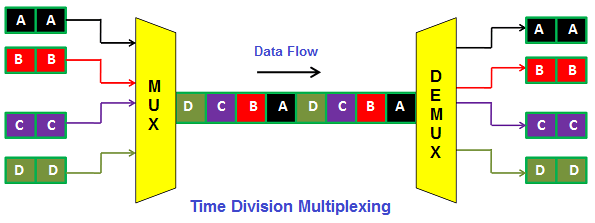

Source: Spiceworks - https://www.spiceworks.com/tech/networking/articles/what-is-tdm/

The differentiation between Multiplexing and Multiple Access technologies is between where the logic to assign and uphold time-slots is implemented. For all intents and purposes, for TDM/TDMA, the resulting behaviour is the same, but TDMA tends to allow for more dynamic allocation of time-slots. This allows high-priority senders to have multiple time-slots, when increases the priority sender's bandwidth.

### 3.1.1 TDM signal-generation
The following code-block allows you to generate a set of data-streams that are multiplexed into a TDM signal. Adjusting the "symbol_duration", will increase or decrease the throughput of each signal.

In [ ]:
# TDM example

# Binary waveform configuration parameters (Can be changed)
symbol_duration = 0.1 # (sec) (Default: 0.1) Becomes buggy below 0.03
simulation_time = 2 # (sec) whole integers (Default: 2)
users = 2 # Whole numbers. Default: 4


#--------------------------------------------------

generate_tdma_signal(simulation_time, symbol_duration, users)


## 3.2 Frequency-Division Multiple Access
Frequency-Division Multiple Access allocates a frequency-set (subchannel) to each user, taken as a slot of the full channel's bandwidth. This allocates a portion of the total bandwidth or data-rate to each user, that it has full access to. This allows for less buffering of data, but the reduced bandwidth of each sub-channel means that only a fraction of the throughput of the total channel is allowed per user.

In [ ]:
# Binary waveform configuration parameters
symbol_duration = 0.1 # (sec) Default: 0.1 Becomes buggy below 0.002
simulation_time = 2 # (sec) whole integers. Default: 2
users = 4 # Code becomes buggy above 8. Default: 4

#--------------------------------------------
# Generate FDMA array
generate_fdma_signal(symbol_duration, simulation_time, users)



## <a id='3.3-Multiplexing Questions'>3.3 Questions [10 points]</a>

**Q3.3.1 [2 points]:** What happens to the bitrate of the combined signal when you increase the amount of users in the TDMA system? What implications does this have on the frequency in the transmitted signal? <br>
*Answer:* <br><br> In a TDMA system, the combined signal's bitrate increases as more users are added, that's because each user's data is transmitted in its own time slot within the same frame. The total bitrate of the combined signal is the sum of the bitrates of all users.

As the bitrate increases, the required bandwidth for the transmitted signal increases as well. This is because higher bitrates mean faster transitions in the signal, which require more bandwidth.

**Q3.3.2 [2 points]:** The frequency plot of the FDMA signal shows the frequency bandwidth of the information signal when modulating the information of the different bit streams. Why would there be a limit on the amount of users for FDMA signal? *Hint:* *https://en.wikipedia.org/wiki/LTE_frequency_bands*<br>
*Answer:* <br><br> There is a limit to the number of users in an FDMA (Frequency Division Multiple Access) system because each user is assigned a separate frequency band for transmission. In a noisy environment, interference can cause these allocated bands to overlap, resulting in cross-talk and signal degradation. As the number of users increases, the available frequency spectrum must be divided into narrower bands, which makes it more difficult to prevent overlap and maintain signal quality.

**Q3.3.3 [2 points]:** If you increase the datarate of the FDMA signal, the bandwidths of the sub-carriers start overlapping. What does this mean for the signal? (Hint: Reduce the symbol_duration to increase datarate. Section 2.8 contains hints)<br>
*Answer:* <br><br> Increasing the datarate each sub-carrier requires more bandwidth to transmit the higher rate of data. When the bandwidths of the sub-carriers start overlapping, it leads to interference between adjacent channels, known as inter-channel interference.

**Q3.3.4 [2 points]:** Is it possible to combine the technologies TDMA and FDMA? How would you apply such a system?<br>
*Answer:* <br><br> TDMA and FDMA are technologies that could be combined, producing FTDMA (Frequency Time Division Multiple Access). In an FTDMA system, each user is assigned a specific frequency band and a time slot for their transmissions. This allows for more efficient use of the available spectrum and can help mitigate interference issues.

**Q3.3.5 [2 points]:** Consider the following two scenarios in a wireless system: scenario A involves a network with variable traffic demand, where users require dynamic bandwidth allocation based on their needs, and scenario B involves a fixed, continuous transmission where simplicity and reliability are more important than flexibility.
Which multiple access scheme (FDMA or TDMA) would be the better choice for each scenario, and why?<br>
*Answer:*  For scenario A, TDMA would be the better choice because it allows for dynamic bandwidth allocation. In contrast, FDMA assigns fixed frequency bands to users, which may lead to inefficient use of resources when traffic patterns change.
For scenario B, FDMA would be more suitable as it provides a simple and reliable method for continuous transmission.


## 3.4 Code-Division Multiple Access
Code-Division multiple access uses the math to diversify different channels within the same bit-stream. This is accomplished by *chipping* each modem's data, which yields a chiprate that is higher than the original bitrate of the datastream. The chipping sequences of each user are different and specifically orthogonal. The chipped streams are then summed together and sent out on the medium.
SEE LECTURE X

The following code block allows an approximation of how a CDMA system can be implemented based on users and symbol rate. The code will output a visualization of how the data from different users is summed together to a complete signal.

In [ ]:
# Variables for adjustment
symbol_duration = 0.1 # (sec) Default: 0.1
simulation_time = 1 # (sec) Default: 1
users = 4 # The script becomes buggy above 32. Default: 4

# Full function to generate and plot signals
generate_cdma_signal(simulation_time, symbol_duration, users)

## <a id='3.4-CDMA Questions'>3.3 Questions [10 points]</a>

**Q3.4.1 [2 points]:** What will happen to the frequency bandwidth of a signal after it goes through chipping? (Hint: What happens when you increase the amount of users to the chipping sequence and the frequency spectrum?)<br>
*Answer:* <br><br> In CDMA When you increase the number of users, each with their own chipping sequence, the overall frequency spectrum used by the system remains the same, but the signals from all users overlap within this wide bandwidth. The required bandwidth for each user's signal after chipping is much greater than the original data signal, and the total system bandwidth must be large enough to accommodate all users' spread signals without excessive interference.

**Q3.4.2 [2 points]:** What factors make CDMA costly compared to FDMA or TDMA?<br>
*Answer:* <br>CDMA can be more costly than FDMA or TDMA due to the following factors:<br>
1. **Complexity of Implementation:** CDMA requires more complex signal processing techniques, such as spreading and despreading, which can increase the cost of hardware and software development.
2. **Power Control:** In CDMA, power control is essential to ensure that all users' signals are received at similar power levels. This requires additional mechanisms and can increase the overall system cost.
3. **Interference Management:** CDMA systems must manage interference between users more effectively, which can require advanced algorithms and additional resources.<br> 


**Q3.4.3 [4 points]:** Given the following chipping sequeces:<br>
Receiver 1: [1, 1]<br>
Receiver 2: [1, -1]<br>
What is the data intended for receiver 1 and 2 in the following chip-stream (Empty/lack of data in the stream can be marked as N):<br>
[1, 1, 2, 0, -1, 1, 0, -2, 1, 1, 0, 2, 2, 0, 0, -2]<br>
*Answer:* <br>

<br>
The answer is:
- Receiver 1: [1, 1, 0, -1, 1, 1, 1, -1]
- Receiver 2: [0, 1, -1, 1, 0, -1, 1, 1]

That is because:
To decode the data intended for each receiver, we can use the dot product of the received chip-stream with each receiver's chipping sequence. To decode we have to know that if the value is:
- 2 -> data is 1
- -2 -> data is -1
- 0 -> no data

We have to multiply each chipping sequence with the received chip-stream in chunks of 2 (the length of the chipping sequences).<br>

<br>



**Q3.4.4 [2 points]:** Write a formula for the minimum length of chip sequence based on number of users in a CDMA system. (Hint: Try to look at the behavior of the chipping sequences in the script). Also, write a formula for the chip-rate of a signal, based on data-rate and length of chipping-sequence or number of users:<br>
*Answer:*  

1. Usually to ensure orthogonality, the length of the chipping sequence ($ L $) should be at least equal to the number of users. So:
   $$
   L_{min} \geq N_{users}
   $$
2. The chip rate ($ R_{chip} $) can be calculated as:
   $$
   R_{chip} = R_{data} \times L
   $$

   > Because each data bit is represented by L chips, the chip rate is L times the data rate.

   For the minumum length use $ N $ instead of $ L $ in the formula above.

## Use of AI
We wish to learn about AI usage in tasks like this. Due to this, please fill in whether you have used AI to answer the questions in the assignment or any assistance with completing the assignment. Please comment what worked, what didn't work and what it was used for:

*AI used for:

fix library import errors
fix some grammatical errors
improve clarity and length of some answers*
